In [38]:
maraton_data <- read.csv("results2005.csv")
head(maraton_data)

summary(maraton_data)

,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,first_name,last_name
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,Hailu Negussie,25,M,Showa,00:05:01,2:11:45,1,1,1,7905,Hailu,Negussie
2,Wilson Onsare,28,M,Nairobi,00:05:02,2:12:21,2,2,2,7941,Wilson,Onsare
3,Benson Cherono,20,M,Baringo,00:05:03,2:12:48,3,3,1,7968,Benson,Cherono
4,Alan Culpepper,32,M,Lafayette,00:05:05,2:13:39,4,4,1,8019,Alan,Culpepper
5,Robert Kipkoech Cheruiyot,26,M,Nandi District,00:05:07,2:14:30,5,5,3,8070,Robert Kipkoech,Cheruiyot
6,Timothy Cherigat,28,M,,00:05:09,2:15:19,6,6,4,8119,Timothy,Cherigat


 display_name            age           gender           residence        
 Length:17528       Min.   :18.00   Length:17528       Length:17528      
 Class :character   1st Qu.:33.00   Class :character   Class :character  
 Mode  :character   Median :41.00   Mode  :character   Mode  :character  
                    Mean   :40.55                                        
                    3rd Qu.:48.00                                        
                    Max.   :83.00                                        
     pace           official_time         overall      gender_result  
 Length:17528       Length:17528       Min.   :    1   Min.   :    1  
 Class :character   Class :character   1st Qu.: 4376   1st Qu.: 2189  
 Mode  :character   Mode  :character   Median : 8764   Median : 4381  
                                       Mean   : 8763   Mean   : 4638  
                                       3rd Qu.:13146   3rd Qu.: 6572  
                                       Max.   :17528   M

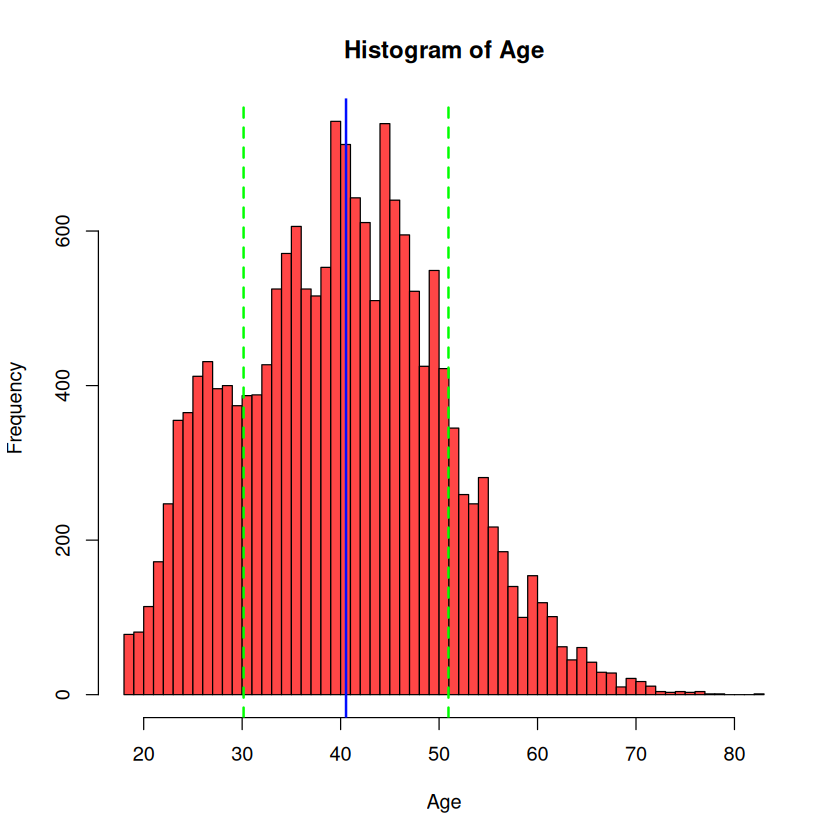

In [2]:
# Calculate mean and standard deviation
mean_age <- mean(maraton_data$age)
sd_age <- sd(maraton_data$age)

# Now plot the histogram
hist(
    maraton_data$age,
    breaks = 50, 
    col = "#ff4646", 
    xlab = "Age", 
    main = "Histogram of Age"
)

# Add mean line
abline(v = mean_age, col = "#000dff", lwd = 2)

# Add standard deviation lines
abline(v = mean_age + sd_age, col = "green", lwd = 2, lty = 2)
abline(v = mean_age - sd_age, col = "green", lwd = 2, lty = 2)

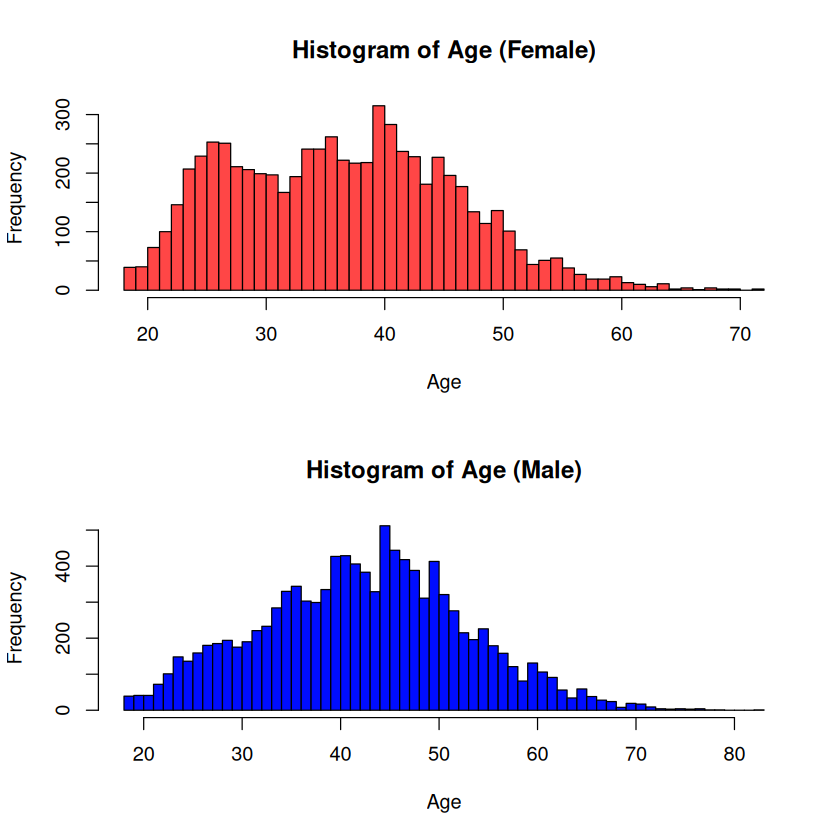

In [3]:
# Split the data frame by gender
gender_data <- split(maraton_data, maraton_data$gender)

# Create separate histograms for each gender
par(mfrow = c(2, 1))  # Set the layout to 2 rows and 1 column

# Histogram for females
hist(
  gender_data$F$age,
  breaks = 50,
  col = "#ff4646",
  xlab = "Age",
  main = "Histogram of Age (Female)"
)

# Histogram for males
hist(
  gender_data$M$age,
  breaks = 50,
  col = "#000dff",
  xlab = "Age",
  main = "Histogram of Age (Male)"
)


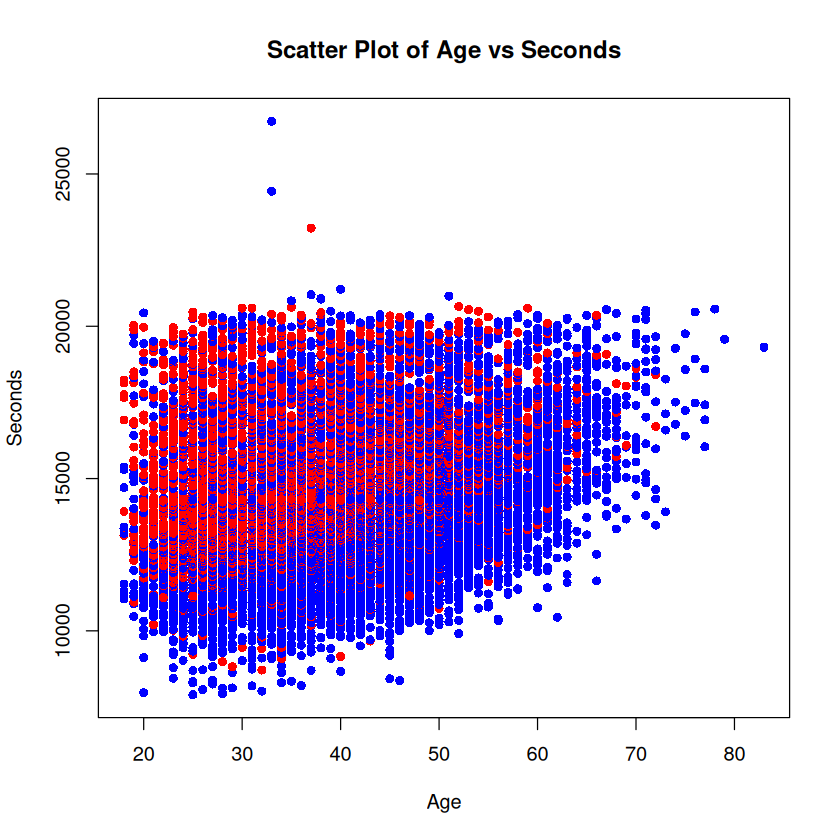

In [30]:
# Scatter plot of age vs seconds with color differentiation by gender
plot(
    maraton_data$age, 
    maraton_data$seconds, 
    col = ifelse(maraton_data$gender == "M", "blue", "red"),
    xlab = "Age", 
    ylab = "Seconds", 
    main = "Scatter Plot of Age vs Seconds",
    pch = 16)

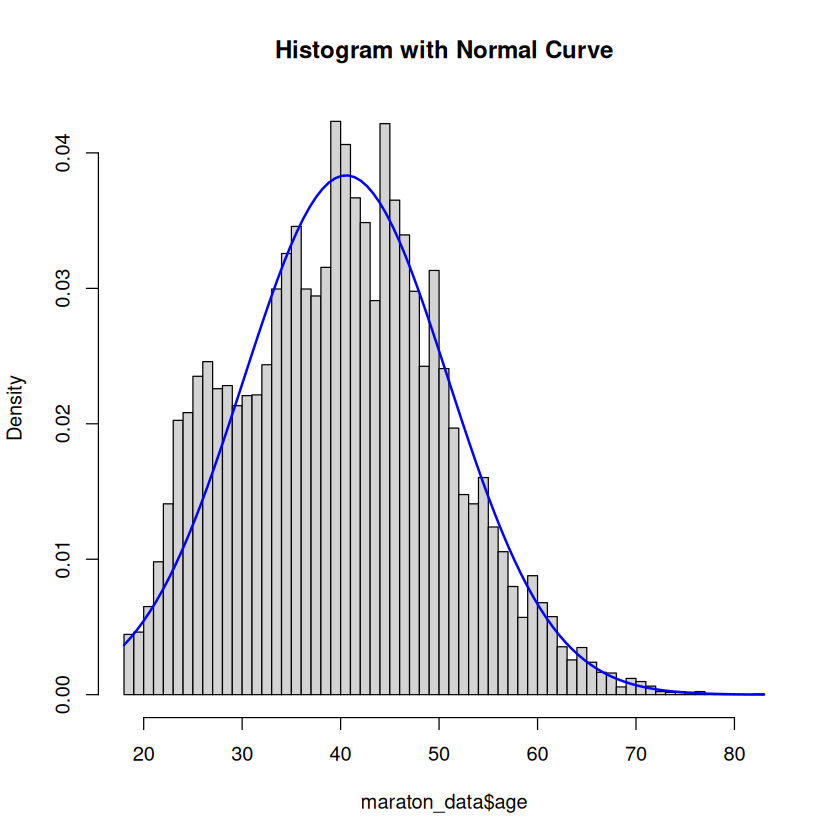

In [35]:
# plot a normal distribution curve in the histogram of ages to see if it fits
hist(maraton_data$age, breaks = 50 ,freq = FALSE, main = "Histogram with Normal Curve")
curve(dnorm(x, mean = mean(maraton_data$age), sd = sd(maraton_data$age)), 
      add = TRUE, col = "blue", lwd = 2)